In [1]:
import warnings; warnings.filterwarnings("ignore") 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import umap
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
plt.rcParams["figure.facecolor"] = "white"

In [4]:
def get_either_param(row, param1, param2, value):
    if row[param1] == value or row[param2] == value:
        return value
    else:
        return "other"

In [5]:
print('\n'.join(f'{m.__name__}\t\t{m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

seaborn		0.12.0
pandas		1.4.4
numpy		1.23.3
umap		0.5.3


In [6]:
data     = pd.read_csv('./data/nELISA_Data.tsv', sep='\t', index_col=None)
metadata = pd.read_csv('./data/nELISA_MetaData.tsv', sep='\t', index_col=None)

In [7]:
data.sample(3)

Plate_ID Well_ID  Analyte_001  Analyte_002  Analyte_003  Analyte_004  \
153  ABC00001     G10           92           83            3           63   
82   ABC00001     D11           50           94           18           32   
616  ABC00002     J17           76           35           12           89   

     Analyte_005  Analyte_006  Analyte_007  Analyte_008  ...  Analyte_011  \
153           78           74           83           45  ...           82   
82            60           52           74           15  ...           41   
616           39           34           42           22  ...           49   

     Analyte_012  Analyte_013  Analyte_014  Analyte_015  Analyte_016  \
153           23           40           17           53           48   
82            48           20           67           19           29   
616           44           52            3           29           52   

     Analyte_017  Analyte_018  Analyte_019  Analyte_020  
153           15           72           45           70  
82            66           20            6           55  
616           93           64           79           40  

[3 rows x 22 columns]

In [8]:
metadata.sample(3)

Well_ID      Condition
185     H18  Condition_018
51      C04  Condition_004
216     J01  Condition_001

In [9]:
df = pd.merge(data, metadata, how="left", on="Well_ID")

In [10]:
column = df.pop('Condition'); df.insert(1, 'Condition', column)

In [11]:
df.sample(3)

Plate_ID      Condition Well_ID  Analyte_001  Analyte_002  Analyte_003  \
749  ABC00002  Condition_006     P06           68           62           26   
594  ABC00002  Condition_019     I19           31           99           60   
102  ABC00001  Condition_007     E07           25           79           33   

     Analyte_004  Analyte_005  Analyte_006  Analyte_007  ...  Analyte_011  \
749           51           83           26           45  ...           55   
594           71            3           53           35  ...           90   
102           54           79           10           28  ...           38   

     Analyte_012  Analyte_013  Analyte_014  Analyte_015  Analyte_016  \
749           18           48           12           38            6   
594           64           87           12           21            8   
102           88           58           16            2           25   

     Analyte_017  Analyte_018  Analyte_019  Analyte_020  
749           59           96           72            3  
594           93           13           27           14  
102           65           70           62           30  

[3 rows x 23 columns]

In [12]:
df0 = pd.melt(df, id_vars=['Plate_ID', 'Condition', 'Well_ID'], var_name='Analyte', value_name='pg/mL')

In [13]:
df0.sample(3)

Plate_ID      Condition Well_ID      Analyte  pg/mL
4132   ABC00001  Condition_005     M05  Analyte_006     74
13759  ABC00002  Condition_008     N08  Analyte_018      8
5496   ABC00001  Condition_001     F01  Analyte_008     22

In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15360 entries, 0 to 15359
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Plate_ID   15360 non-null  object
 1   Condition  15360 non-null  object
 2   Well_ID    15360 non-null  object
 3   Analyte    15360 non-null  object
 4   pg/mL      15360 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 600.1+ KB


<Figure size 1400x1000 with 0 Axes>

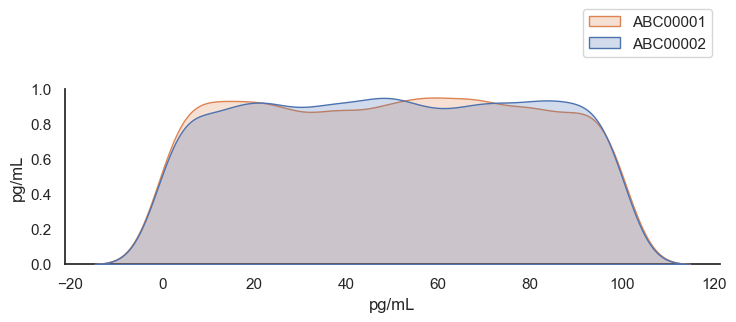

In [15]:
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
ax = sns.pairplot(df0, hue='Plate_ID', diag_kind="kde", 
                 height=2.5, aspect=3, corner=False)
ax._legend.remove()
plt.legend(['ABC00001', 'ABC00002'], bbox_to_anchor=(1.0, 1.5))

In [16]:
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
ax = sns.pairplot(df0, hue='Plate_ID', diag_kind="hist", 
                 height=2.5, aspect=3, corner=False)
ax._legend.remove()
plt.legend(['ABC00001', 'ABC00002'], bbox_to_anchor=(1.0, 1.5))
#ax.map_lower(sns.kdeplot, levels=4, color=".2")

<Figure size 1400x1000 with 0 Axes>

In [17]:
reducer= umap.UMAP(n_neighbors=24, min_dist=0.8, learning_rate=0.5, spread=5, random_state=42)

In [18]:
analyte_data = df[
    ["Analyte_001", "Analyte_002", "Analyte_003", "Analyte_004", "Analyte_005", 
     "Analyte_006", "Analyte_007", "Analyte_008", "Analyte_009", "Analyte_010",
     "Analyte_011", "Analyte_012", "Analyte_013", "Analyte_014", "Analyte_015",
     "Analyte_016", "Analyte_017", "Analyte_018", "Analyte_019", "Analyte_020"]
].values

In [19]:
# analyte_data

In [20]:
# Converts each feature into z-scores (number of SD from the mean) for comparability.
scaled_analyte_data = StandardScaler().fit_transform(analyte_data)

In [21]:
%%time
embedding = reducer.fit_transform(scaled_analyte_data)
embedding.shape

CPU times: total: 10.8 s
Wall time: 10 s


(768, 2)

In [22]:
type_dict = {"ABC00001": "#F08030", "ABC00002": "#78C850"}
type_dict

{'ABC00001': '#F08030', 'ABC00002': '#78C850'}

In [23]:
#c = [sns.color_palette()[x] for x in df.Condition.map({"Condition_001" : 0, "Condition_002" : 1, "Condition_003" : 2})]

In [24]:
UMAP_df = pd.DataFrame(embedding).join(df)
UMAP_df.rename(columns={0: 'x', 1: 'y'}, inplace=True)
column = UMAP_df.pop('x'); UMAP_df.insert(4, 'x', column)
column = UMAP_df.pop('y'); UMAP_df.insert(4, 'y', column)
UMAP_df.to_csv("UMAP_df.csv", sep="\t", index=False)
UMAP_df.sample(3)

Plate_ID      Condition Well_ID         x          y  Analyte_001  \
13   ABC00001  Condition_014     A14 -3.438335   1.651845           64   
174  ABC00001  Condition_007     H07  2.959956  11.119388           13   
476  ABC00002  Condition_021     D21 -5.029789  -1.293202           79   

     Analyte_002  Analyte_003  Analyte_004  Analyte_005  ...  Analyte_011  \
13            54           99           77           26  ...           22   
174           40           99           46           11  ...           18   
476           77           41           11           70  ...           78   

     Analyte_012  Analyte_013  Analyte_014  Analyte_015  Analyte_016  \
13            86            3           34           95           57   
174            6           70           70           38           75   
476           62           24           55           90            9   

     Analyte_017  Analyte_018  Analyte_019  Analyte_020  
13            53           73           63           29  
174           55           18           79           19  
476           40           53           65           38  

[3 rows x 25 columns]

In [25]:
Condition_types = UMAP_df.Plate_ID.unique().tolist()
Condition_types

['ABC00001', 'ABC00002']

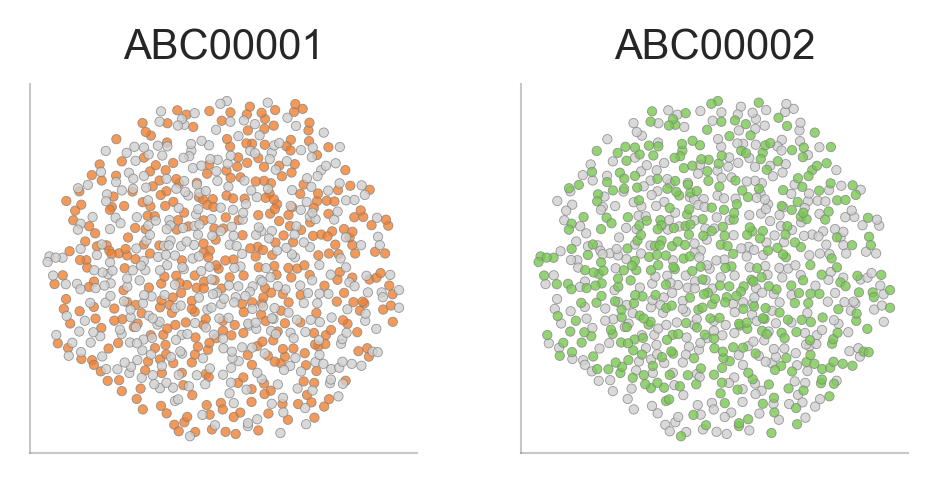

In [26]:
fig, axes = plt.subplots(4, 6, figsize=(10, 6), dpi=300, subplot_kw={'aspect': 'equal'})
plt.subplots_adjust(wspace=0.02, hspace=0.2)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -
for i, this_type in enumerate(sorted(Condition_types)):
    colors = len(UMAP_df.Plate_ID.unique().tolist())
    df_copy = UMAP_df.copy(); ax = axes.flat[i]
    palette = {this_type: type_dict[this_type], "other": "#D0D0D0"}
    color_vals = df_copy.apply(get_either_param, 1, param1="Condition", param2="Plate_ID", value=this_type)
    df_copy["color"] = color_vals
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -    
    sns.scatterplot(data=UMAP_df, x = 'x', y='y', s=5, hue=df_copy.color, palette = palette, 
        legend=False, edgecolor="#808080", linewidth=0.2, alpha=0.8, ax=ax)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -        
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(this_type, fontsize=10)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#909090'); ax.spines[spine].set_alpha(0.5); ax.spines[spine].set_linewidth(0.5)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
i += 1
while i < 24:
    axes.flat[i].set_visible(False)
    i += 1
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
plt.tight_layout()
#plt.savefig("./figures/nELISA_Plates.png", dpi=600, bbox_inches="tight")
plt.show()

In [27]:
type_dict = {
    "Condition_001": "#e60049", "Condition_002": "#0bb4ff", "Condition_003": "#4421af", "Condition_004": "#b30000",
    "Condition_005": "#9b19f5", "Condition_006": "#c80064", "Condition_007": "#dc0ab4", "Condition_008": "#FFAA1D",
    "Condition_009": "#703848", "Condition_010": "#ffb400", "Condition_011": "#705848", "Condition_012": "#F85888",
    "Condition_013": "#F08030", "Condition_014": "#78C850", "Condition_015": "#6890F0", "Condition_016": "#a8b820",
    "Condition_017": "#a8a878", "Condition_018": "#A040A0", "Condition_019": "#F8D030", "Condition_020": "#E0C068",
    "Condition_021": "#703848", "Condition_022": "#F85888", "Condition_023": "#705848", "Condition_024": "#F85888",    
}

In [28]:
Condition_types = ['Condition_001', 'Condition_002', 'Condition_003', 'Condition_004', 'Condition_005', 'Condition_006', 'Condition_007', 'Condition_008',
                   'Condition_009', 'Condition_010', 'Condition_011', 'Condition_012', 'Condition_013', 'Condition_014', 'Condition_015', 'Condition_016']

In [29]:
#Condition_types = UMAP_df.Condition.unique().tolist()

In [38]:
%%time
fig, axes = plt.subplots(4, 6, figsize=(12, 8), dpi=300, subplot_kw={'aspect': 'equal'})
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -
for i, this_type in enumerate(sorted(Condition_types)):
    palette = {this_type: type_dict[this_type], "other": "#E0E0E0"}; ax = axes.flat[i]
    color_vals = df_copy.apply(get_either_param, 1, param1="Condition", param2="Plate_ID", value=this_type)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -         
    UMAP_df["color"] = color_vals; UMAP_df0 = UMAP_df[UMAP_df.Condition == this_type]
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -        
    sns.scatterplot(data=UMAP_df, x = 'x', y='y', s=15, hue="color", palette=palette, 
        legend=False, edgecolor="#808080", linewidth=0.3, alpha=0.8, ax=ax)
    sns.scatterplot(data=UMAP_df0, x = 'x', y='y', s=20, hue="color", palette=palette, 
        legend=False, edgecolor="#808080", linewidth=0.3, alpha=0.8, ax=ax)       
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -       
    xmin, xmax = ax.get_xlim(); a=xmin-0.5; b=xmax+0.5; ax.set_xlim(a, b)
    ymin, ymax = ax.get_ylim(); c=ymin-0.5; d=ymax+0.5; ax.set_ylim(c, d)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -        
    ax.xaxis.set_visible(False); ax.yaxis.set_visible(False)
    ax.set_title(this_type, fontsize=12, pad=5)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#808080')      
        ax.spines[spine].set_alpha(1)
        ax.spines[spine].set_linewidth(0.5)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
i += 1
while i < 24:
    axes.flat[i].set_visible(False)
    i += 1
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
plt.tight_layout()
#plt.savefig("./figures/nELISA_Conditions.png", dpi=600, bbox_inches="tight")
plt.show()

CPU times: total: 2.61 s
Wall time: 2.62 s


In [31]:
plates = UMAP_df.Plate_ID.unique().tolist()
plates

['ABC00001', 'ABC00002']

ABC00001


<Figure size 1400x1000 with 0 Axes>

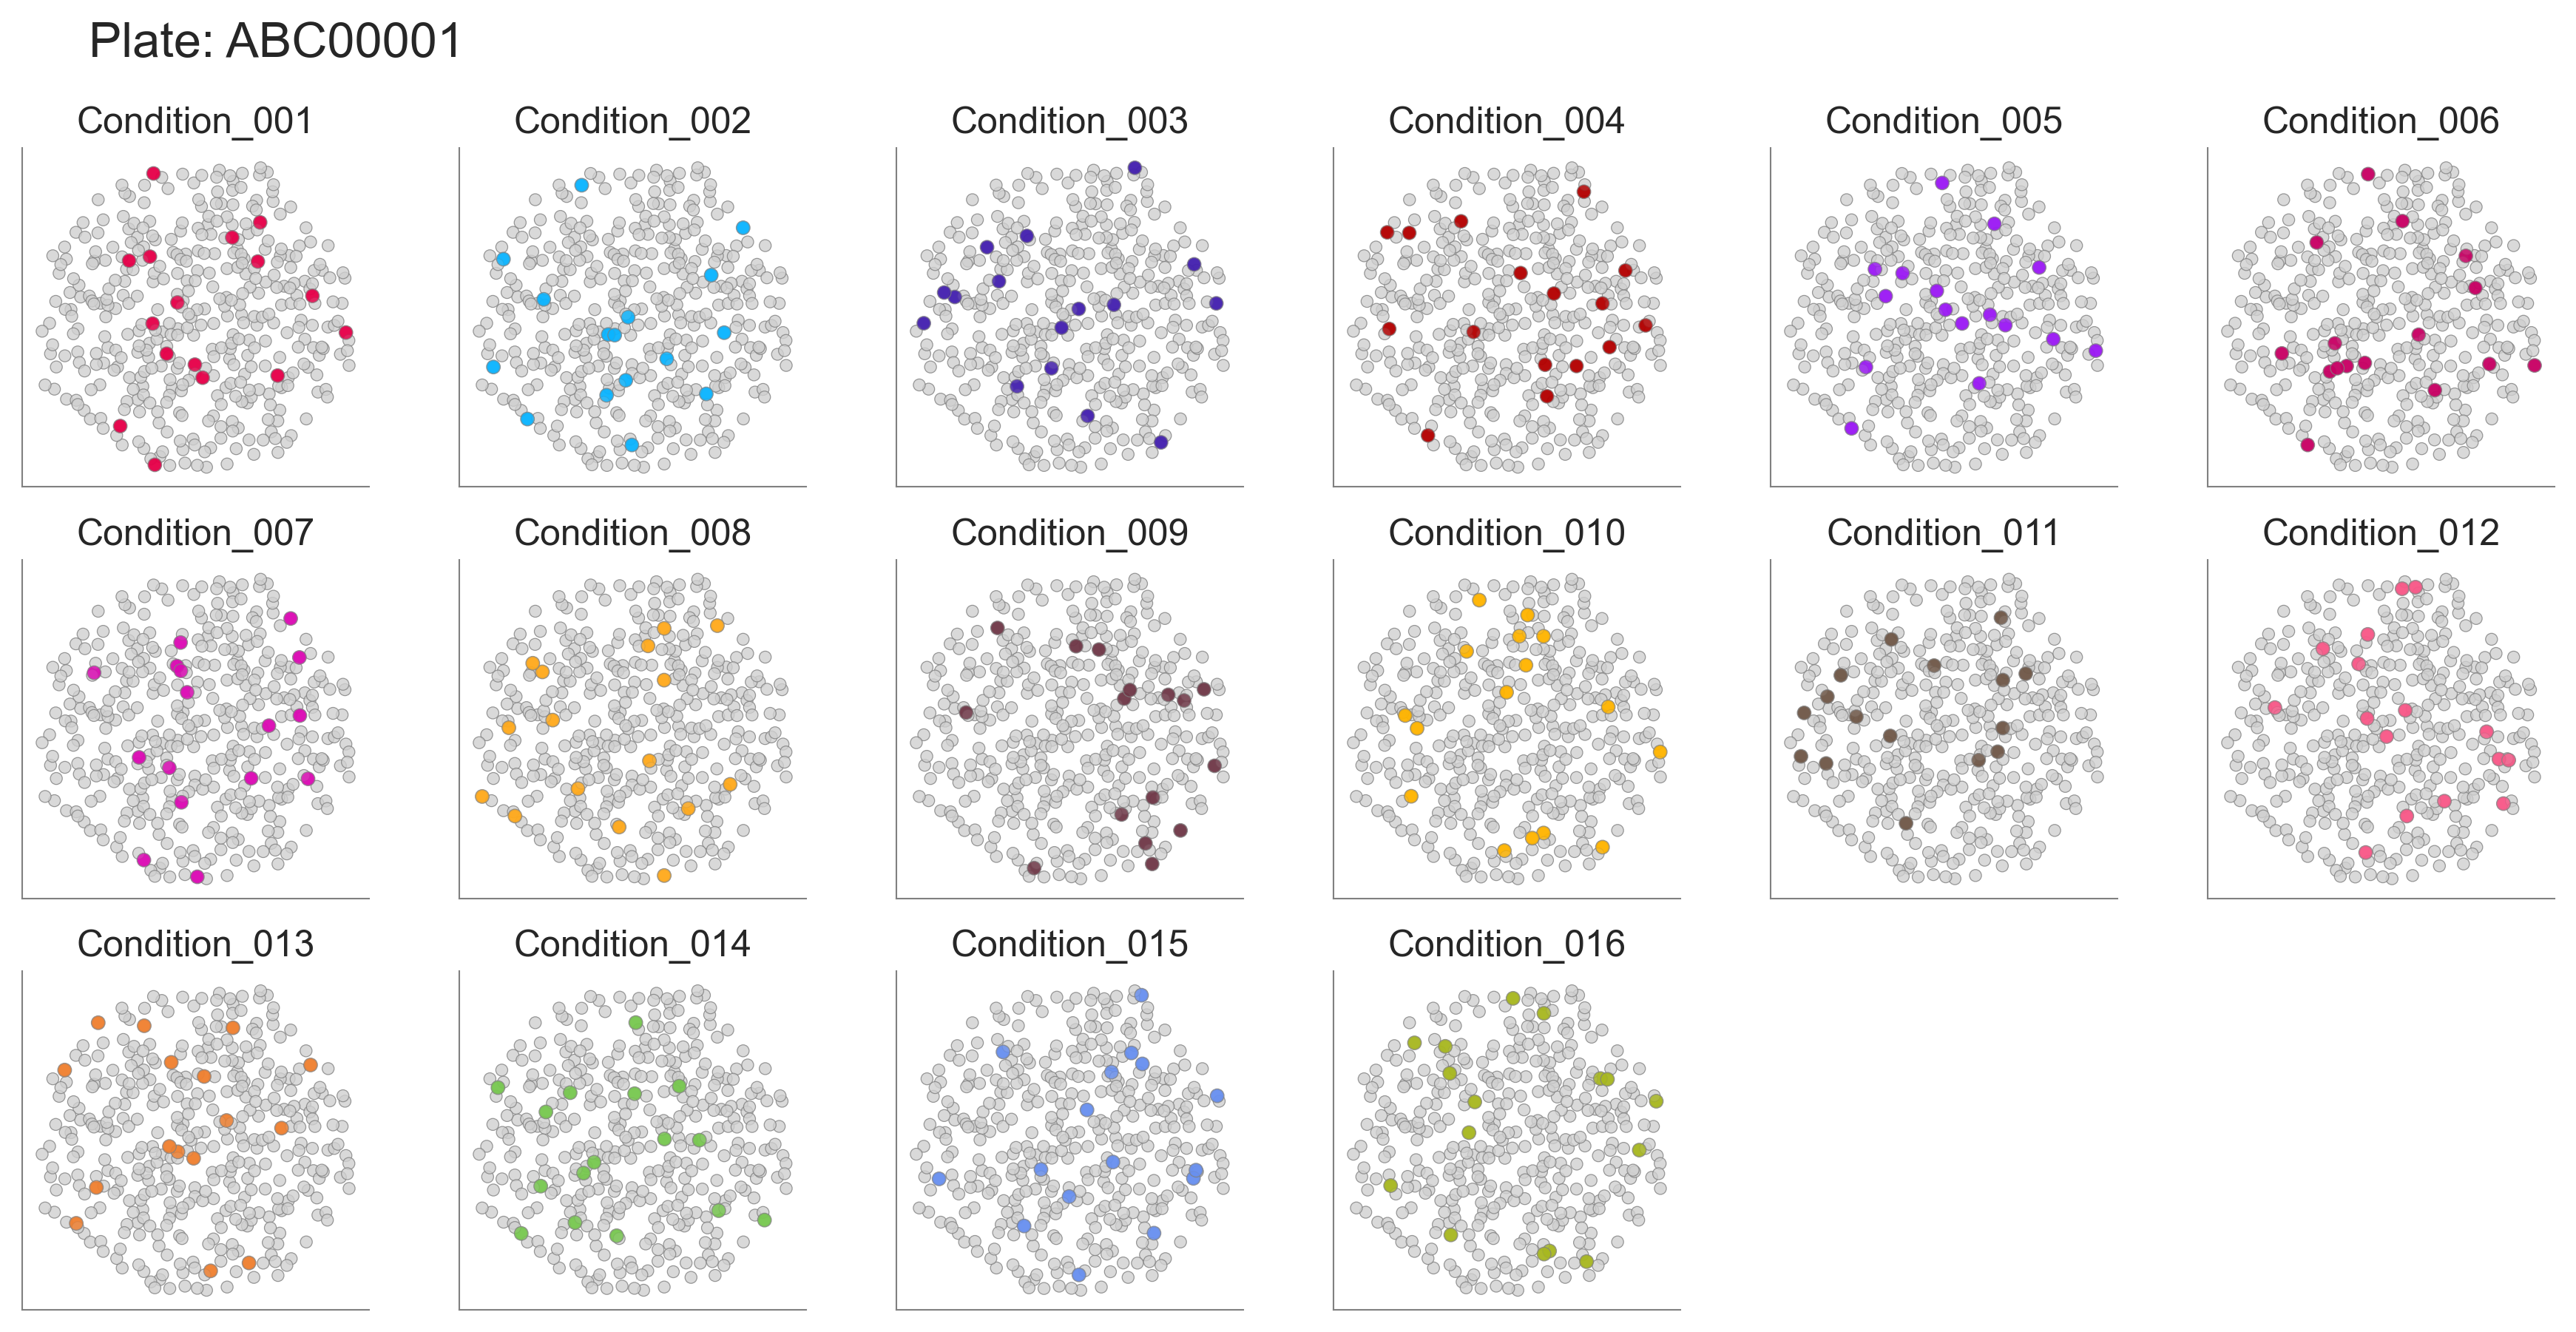

ABC00002


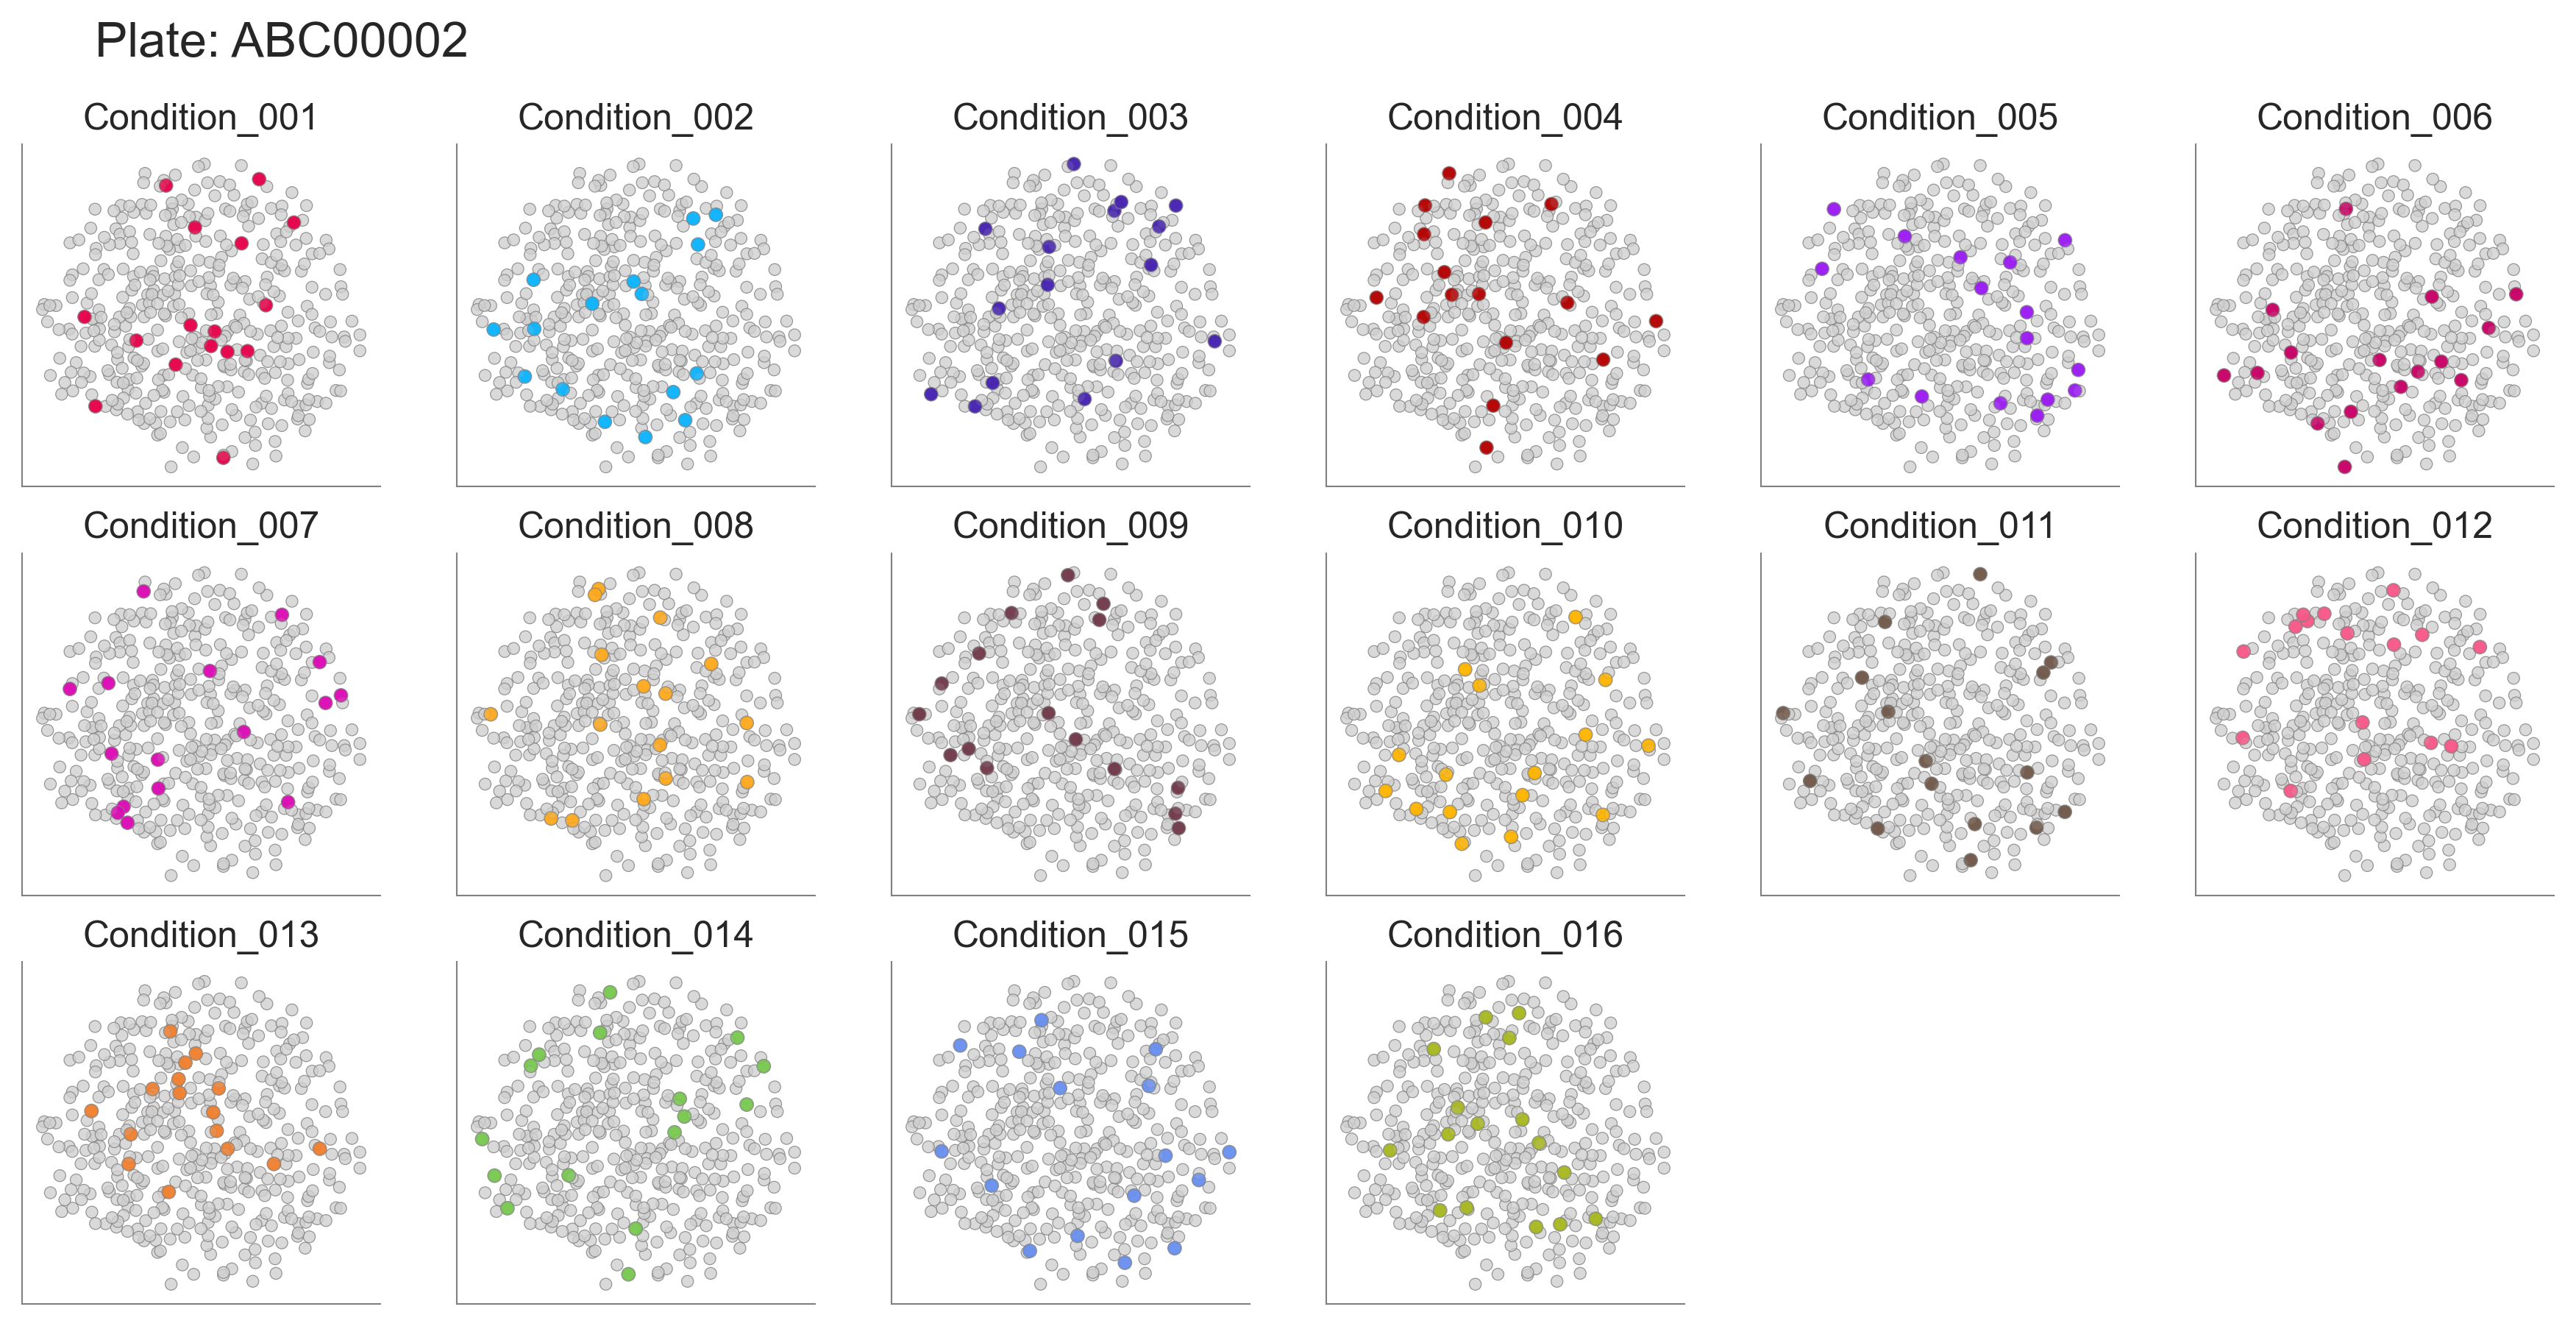

CPU times: total: 4.48 s
Wall time: 4.46 s


In [37]:
%%time
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -
for plate in plates:
    print(plate)
    UMAP_df0 = UMAP_df[UMAP_df.Plate_ID == plate]
    fig, axes = plt.subplots(4, 6, figsize=(12, 8), dpi=300, subplot_kw={'aspect': 'equal'})
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -        
    for i, this_type in enumerate(sorted(Condition_types)):
        palette = {this_type: type_dict[this_type], "other": "#D0D0D0"}; ax = axes.flat[i]
        color_vals = df_copy.apply(get_either_param, 1, param1="Condition", param2="Plate_ID", value=this_type)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -         
        UMAP_df0["color"] = color_vals; UMAP_df00 = UMAP_df0[UMAP_df0.Condition == this_type]; 
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -    
        sns.scatterplot(data=UMAP_df0, x = 'x', y='y', s=15, hue="color", palette=palette, 
        legend=False, edgecolor="#808080", linewidth=0.3, alpha=0.8, ax=ax)
        sns.scatterplot(data=UMAP_df00, x = 'x', y='y', s=20, hue="color", palette=palette, 
        legend=False, edgecolor="#808080", linewidth=0.3, alpha=0.8, ax=ax)       
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -       
        xmin, xmax = ax.get_xlim(); a=xmin-0.4; b=xmax+0.4; ax.set_xlim(a, b)
        ymin, ymax = ax.get_ylim(); c=ymin-0.4; d=ymax+0.4; ax.set_ylim(c, d)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -        
        ax.xaxis.set_visible(False); ax.yaxis.set_visible(False)
        ax.set_title(this_type, fontsize=12, pad=5)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_color('#808080')      
            ax.spines[spine].set_alpha(1)
            ax.spines[spine].set_linewidth(0.5)
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
    i += 1
    while i < 24:
        axes.flat[i].set_visible(False)
        i += 1
#     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     -     - 
    fig.suptitle("Plate: "+plate, x=0.12, y=0.98, fontsize=16)
    plt.tight_layout()
    #plt.savefig("./figures/nELISA_Conditions.png", dpi=600, bbox_inches="tight")
    plt.show()